In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [33]:
data=pd.read_csv('Train.csv')

In [34]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
# number of points and number of features
data.shape

(8523, 12)

In [36]:
# getting  some information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Categorical features

1.	Item_Identifier
2.	Item_Fat_Content
3.	Item_Type
4.	Outlet_Identifier
5.	Outlet_Size
6.	Outlet_Location_Type
7.	Outlet_Type

# Numerical features

1.	Item_Weight
2.	Item_Visibility
3.	Item_MRP
4.	Outlet_Establishment_Year
5.	Item_Outlet_Sales




In [37]:
# checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [38]:
# mean value of "item Weight" column
data['Item_Weight'].mean()

12.857645184135976

In [39]:
# filling  the missing values in  " item_weight column" with mean value
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [40]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [41]:
# filling the missing in outlet size column with mode
mode_of_Outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [42]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [43]:
miss_values = data['Outlet_Size'].isnull()

In [44]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [45]:
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [46]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [47]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


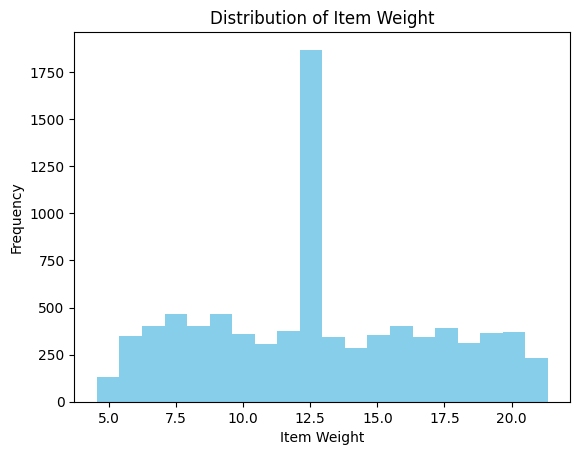

In [48]:

# Create histogram for Item_Weight
plt.hist(data['Item_Weight'], bins=20, color='skyblue')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Item Weight')
plt.show()


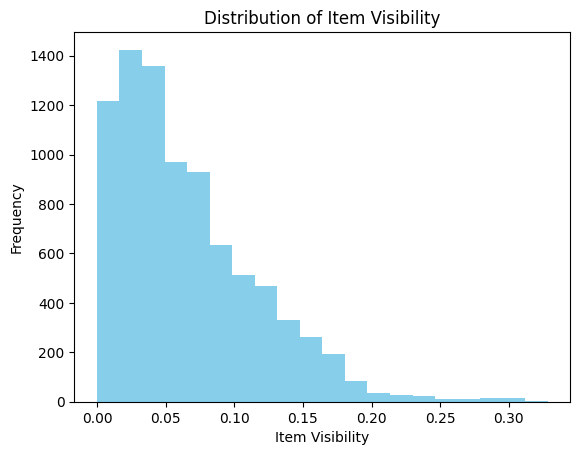

In [49]:
# Create histogram for Item_Visibility
plt.hist(data['Item_Visibility'], bins=20, color='skyblue')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.title('Distribution of Item Visibility')
plt.show()

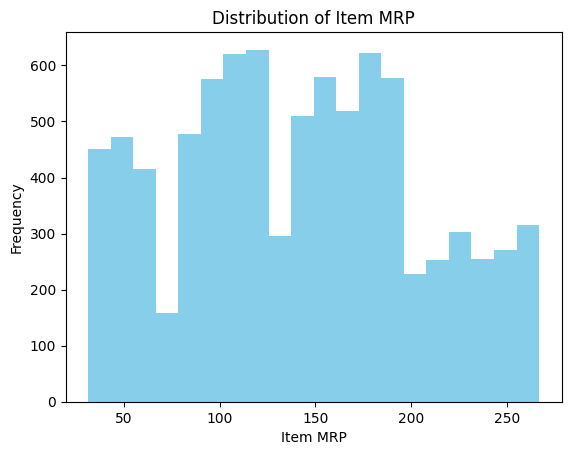

In [50]:

# Create histogram for Item_MRP
plt.hist(data['Item_MRP'], bins=20, color='skyblue')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.title('Distribution of Item MRP')
plt.show()

<ipython-input-51-b82c1d7f94c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Outlet_Establishment_Year', palette='Set2')


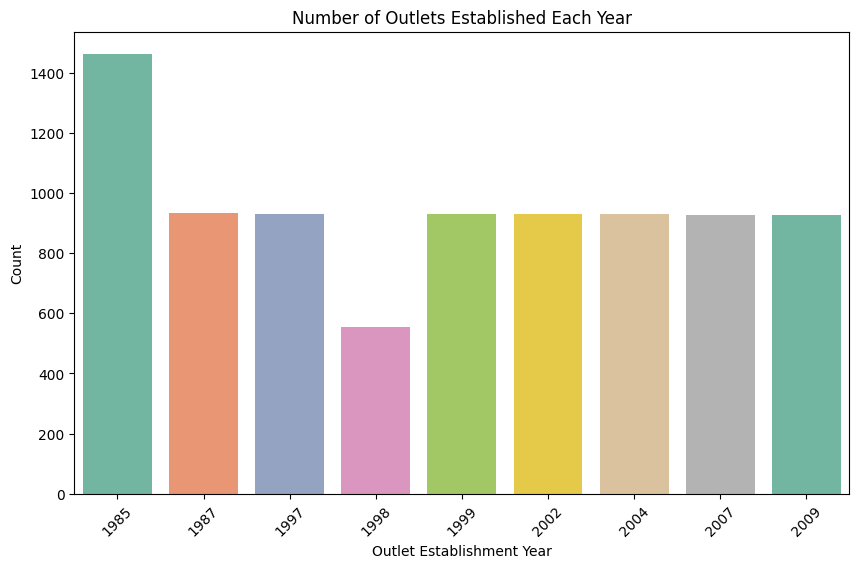

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Outlet_Establishment_Year', palette='Set2')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Count')
plt.title('Number of Outlets Established Each Year')
plt.xticks(rotation=45)
plt.show()

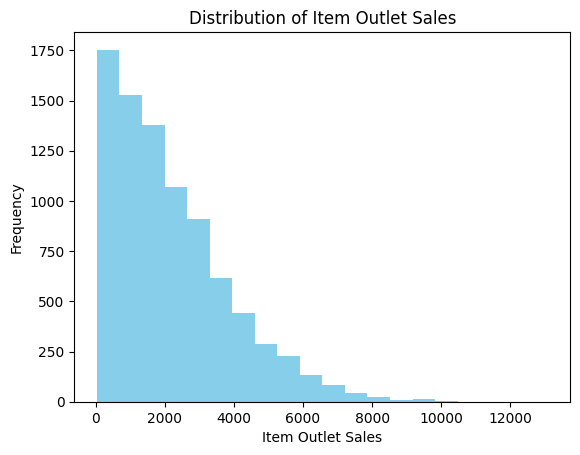

In [52]:
plt.hist(data['Item_Outlet_Sales'], bins=20, color='skyblue')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Item Outlet Sales')
plt.show()

<ipython-input-53-012006afef41>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


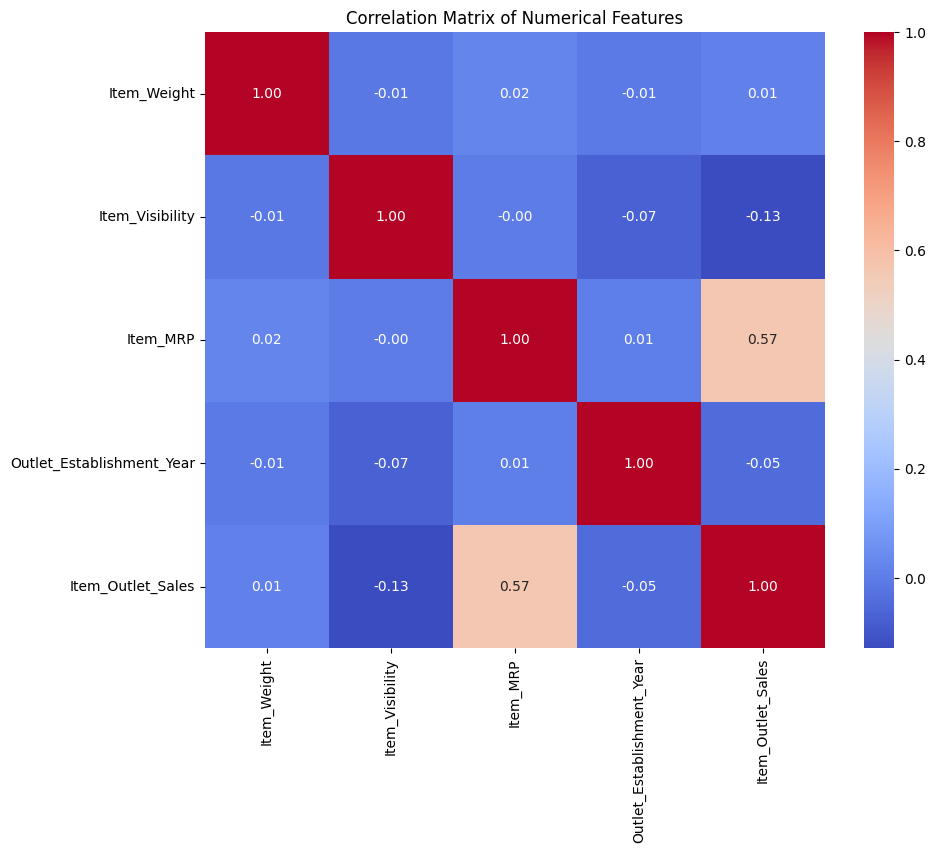

In [53]:
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

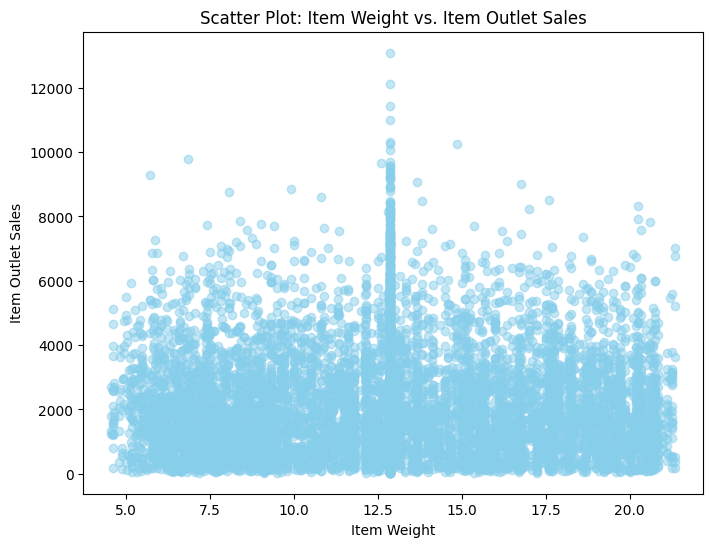

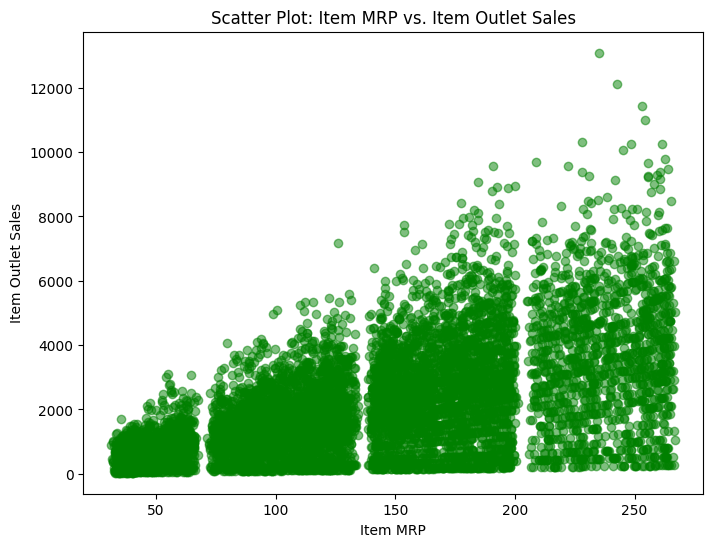

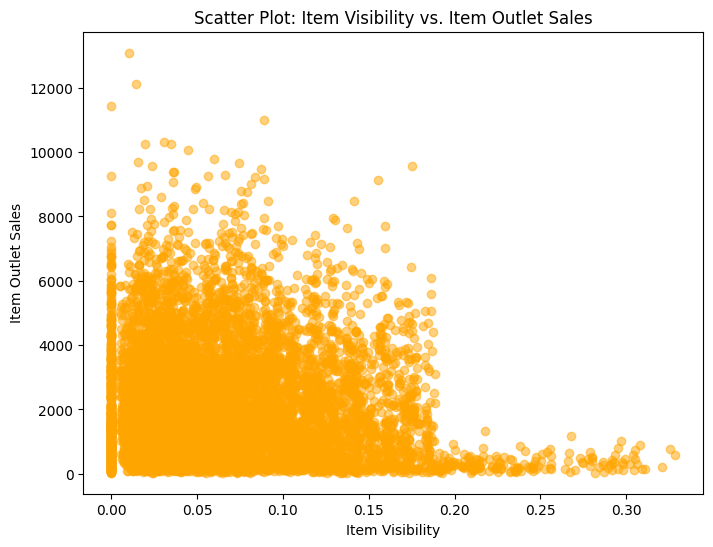

In [54]:
# Scatter plot: Item_Weight vs. Item_Outlet_Sales
plt.figure(figsize=(8, 6))
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'], alpha=0.5, color='skyblue')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot: Item Weight vs. Item Outlet Sales')
plt.show()

# Scatter plot: Item_MRP vs. Item_Outlet_Sales
plt.figure(figsize=(8, 6))
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'], alpha=0.5, color='green')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot: Item MRP vs. Item Outlet Sales')
plt.show()

# Scatter plot: Item_Visibility vs. Item_Outlet_Sales
plt.figure(figsize=(8, 6))
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'], alpha=0.5, color='orange')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot: Item Visibility vs. Item Outlet Sales')
plt.show()

<ipython-input-55-904d7413c385>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Item_Fat_Content', palette='Set2')


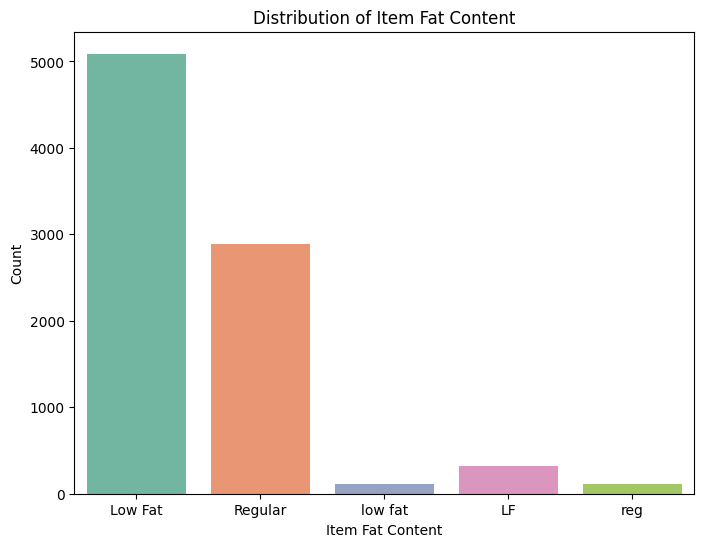

<ipython-input-55-904d7413c385>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Item_Type', palette='Set3')


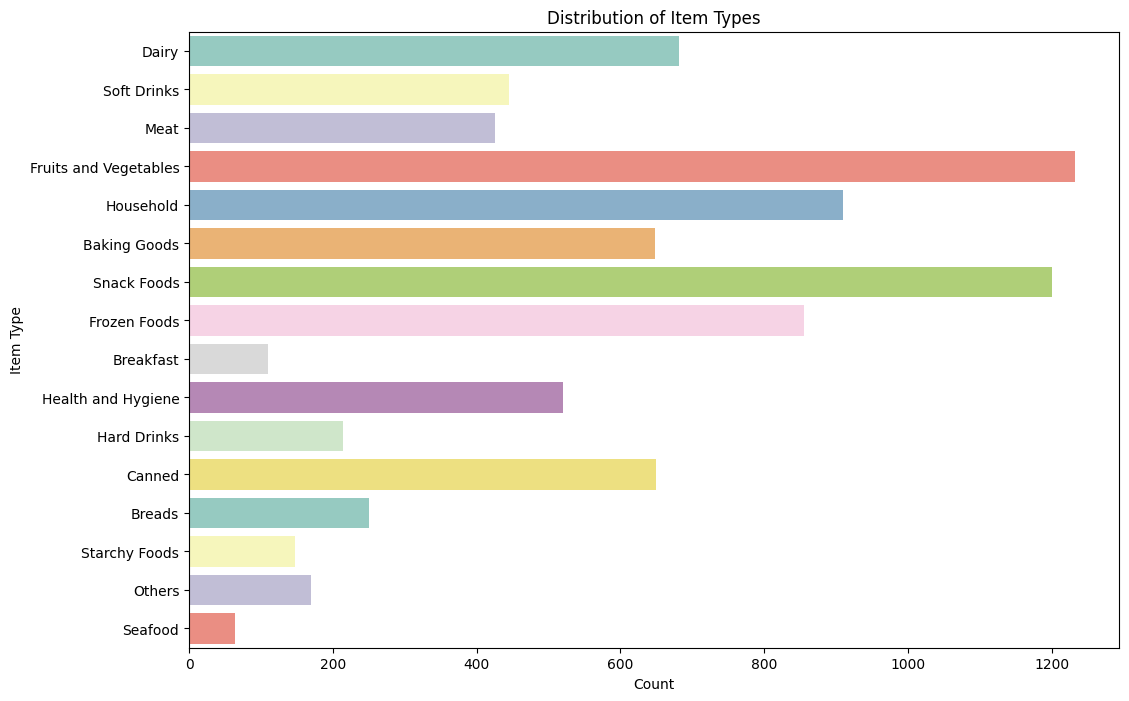

<ipython-input-55-904d7413c385>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Outlet_Size', palette='Set1')


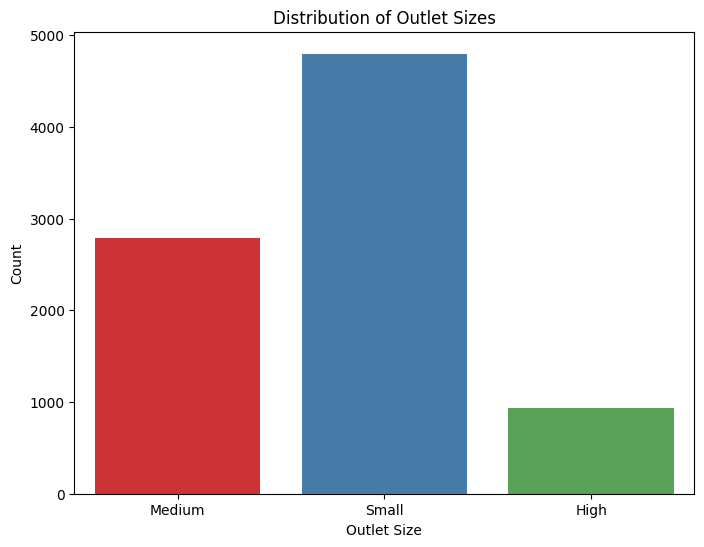

In [55]:
# Create count plot for Item_Fat_Content
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Item_Fat_Content', palette='Set2')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.title('Distribution of Item Fat Content')
plt.show()

# Create count plot for Item_Type
plt.figure(figsize=(12, 8))
sns.countplot(data=data, y='Item_Type', palette='Set3')
plt.xlabel('Count')
plt.ylabel('Item Type')
plt.title('Distribution of Item Types')
plt.show()

# Create count plot for Outlet_Size
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Outlet_Size', palette='Set1')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Distribution of Outlet Sizes')
plt.show()

<ipython-input-56-bfda9d2c98ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', palette='Set2')


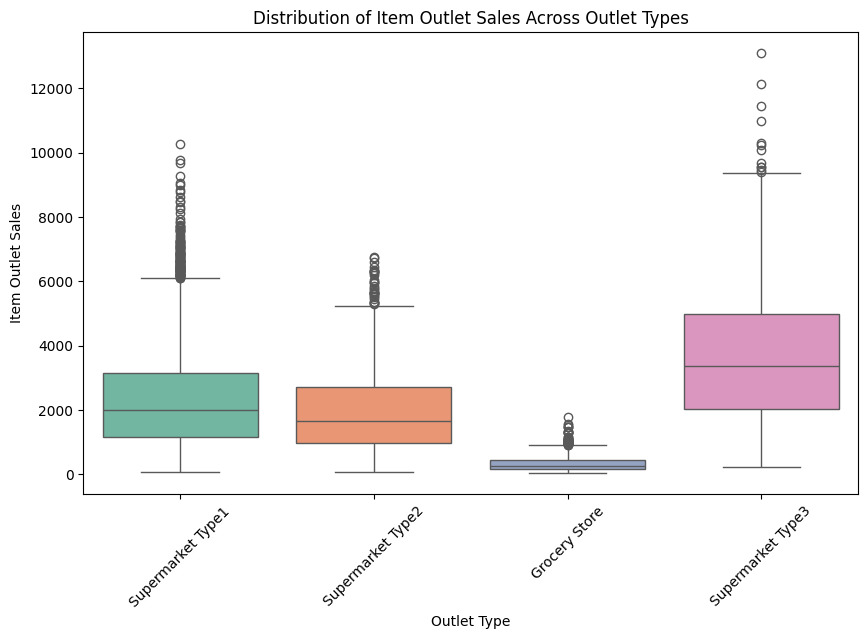

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', palette='Set2')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Distribution of Item Outlet Sales Across Outlet Types')
plt.xticks(rotation=45)
plt.show()

<ipython-input-57-d218b788f2a3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_outlet_type, x='Outlet_Type', y='Item_Outlet_Sales', palette='Set3')


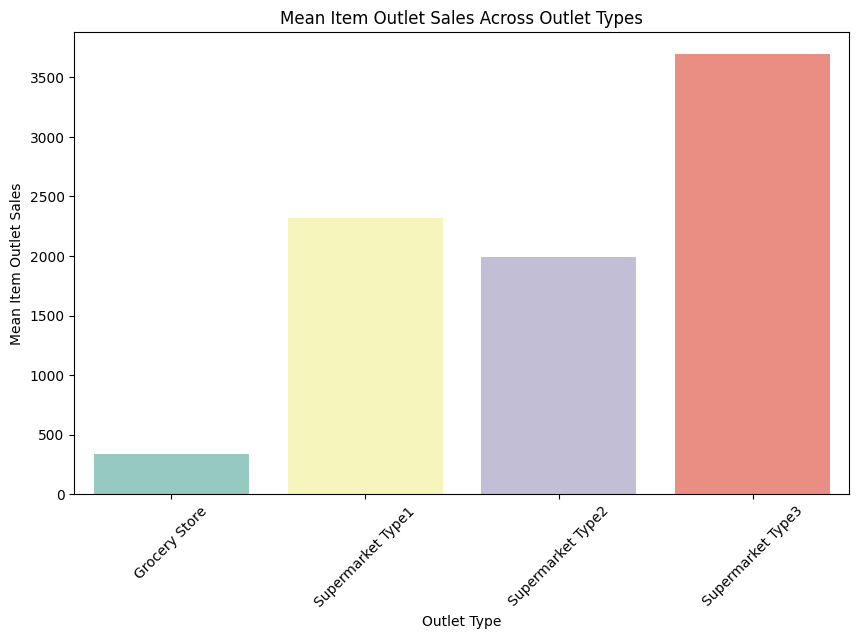

In [57]:
# Calculate mean Item_Outlet_Sales for each Outlet_Type
sales_by_outlet_type = data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index()

# Create grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_outlet_type, x='Outlet_Type', y='Item_Outlet_Sales', palette='Set3')
plt.xlabel('Outlet Type')
plt.ylabel('Mean Item Outlet Sales')
plt.title('Mean Item Outlet Sales Across Outlet Types')
plt.xticks(rotation=45)
plt.show()

<ipython-input-31-68c88e63ed44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 39.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 85.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packa

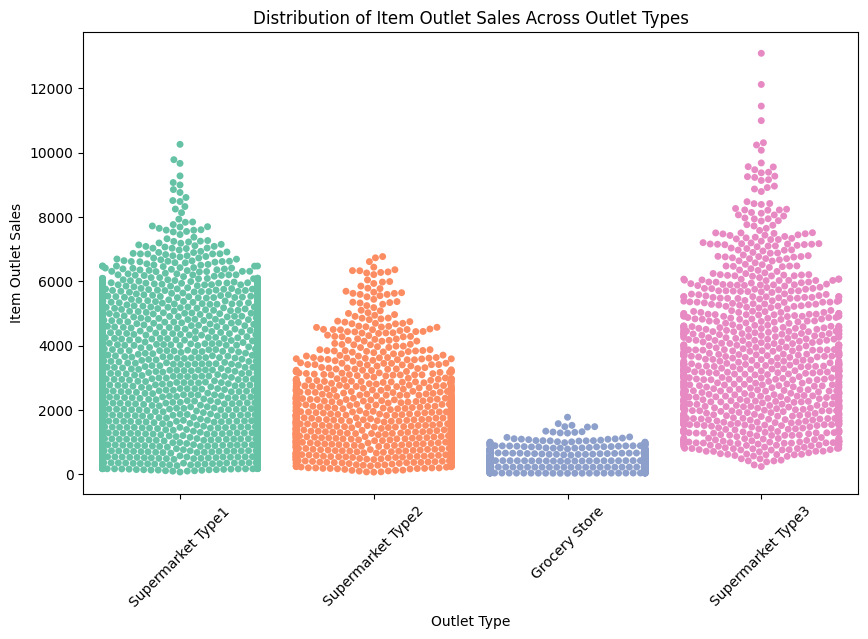

In [31]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', palette='Set2')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Distribution of Item Outlet Sales Across Outlet Types')
plt.xticks(rotation=45)
plt.show()

<ipython-input-58-0e9f504d4b59>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Weight'])


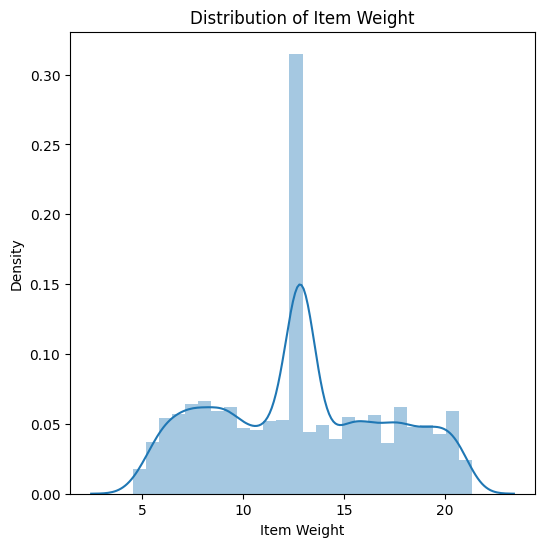

In [58]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'])
plt.xlabel('Item Weight')
plt.ylabel('Density')
plt.title('Distribution of Item Weight')
plt.show()

<ipython-input-59-1d3b565027ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Visibility'])


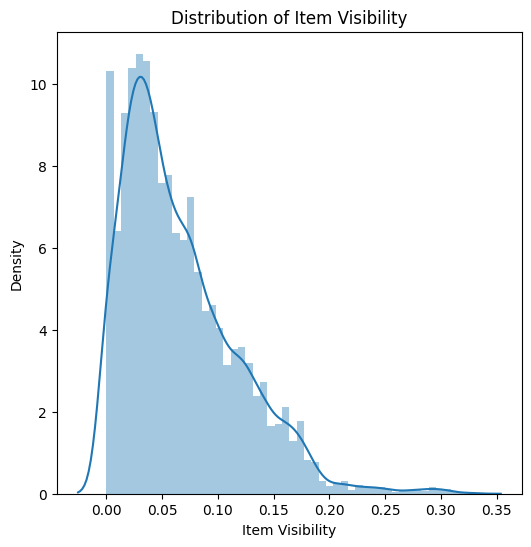

In [59]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Visibility'])
plt.xlabel('Item Visibility')
plt.ylabel('Density')
plt.title('Distribution of Item Visibility')
plt.show()

<ipython-input-60-919a5639f9d5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_MRP'])


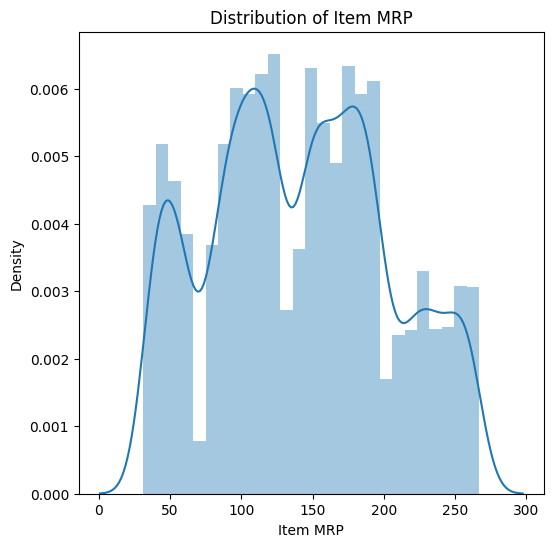

In [60]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.xlabel('Item MRP')
plt.ylabel('Density')
plt.title('Distribution of Item MRP')
plt.show()

<ipython-input-61-fbeb4676e718>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


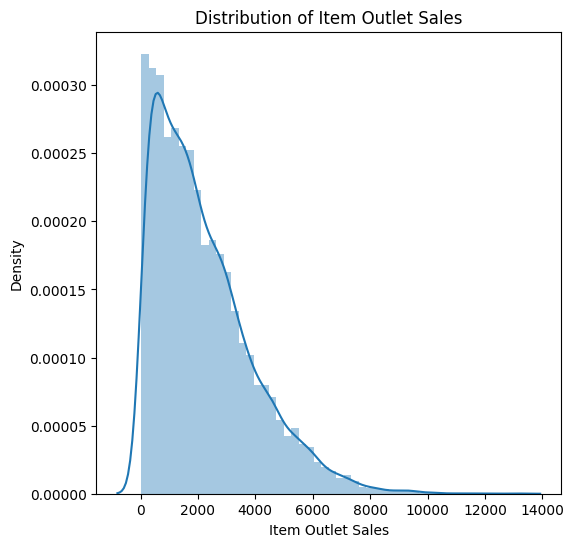

In [61]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Outlet_Sales'])
plt.xlabel('Item Outlet Sales')
plt.ylabel('Density')
plt.title('Distribution of Item Outlet Sales')
plt.show()

<ipython-input-62-789824930e60>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Establishment_Year', data=data, palette='Set2')


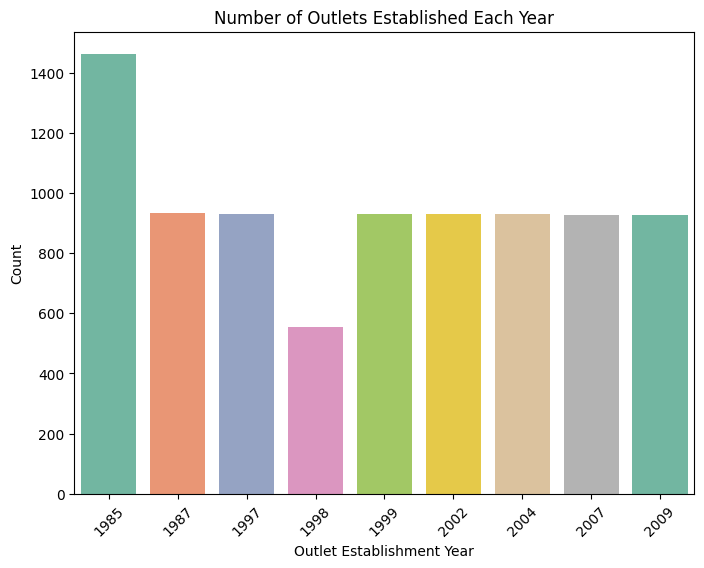

In [62]:
# Count plot for Outlet Establishment Year
plt.figure(figsize=(8, 6))
sns.countplot(x='Outlet_Establishment_Year', data=data, palette='Set2')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Count')
plt.title('Number of Outlets Established Each Year')
plt.xticks(rotation=45)
plt.show()

<ipython-input-63-a863ff4c4ac1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content', data=data, palette='Set3')


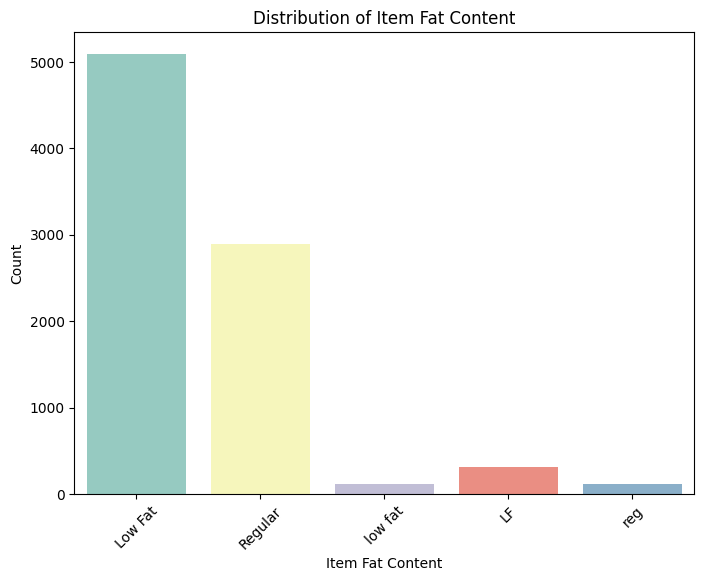

In [63]:
# Count plot for Item Fat Content
plt.figure(figsize=(8, 6))
sns.countplot(x='Item_Fat_Content', data=data, palette='Set3')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.title('Distribution of Item Fat Content')
plt.xticks(rotation=45)
plt.show()

<ipython-input-64-9b34f6ab9427>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type', data=data, palette='Set1')


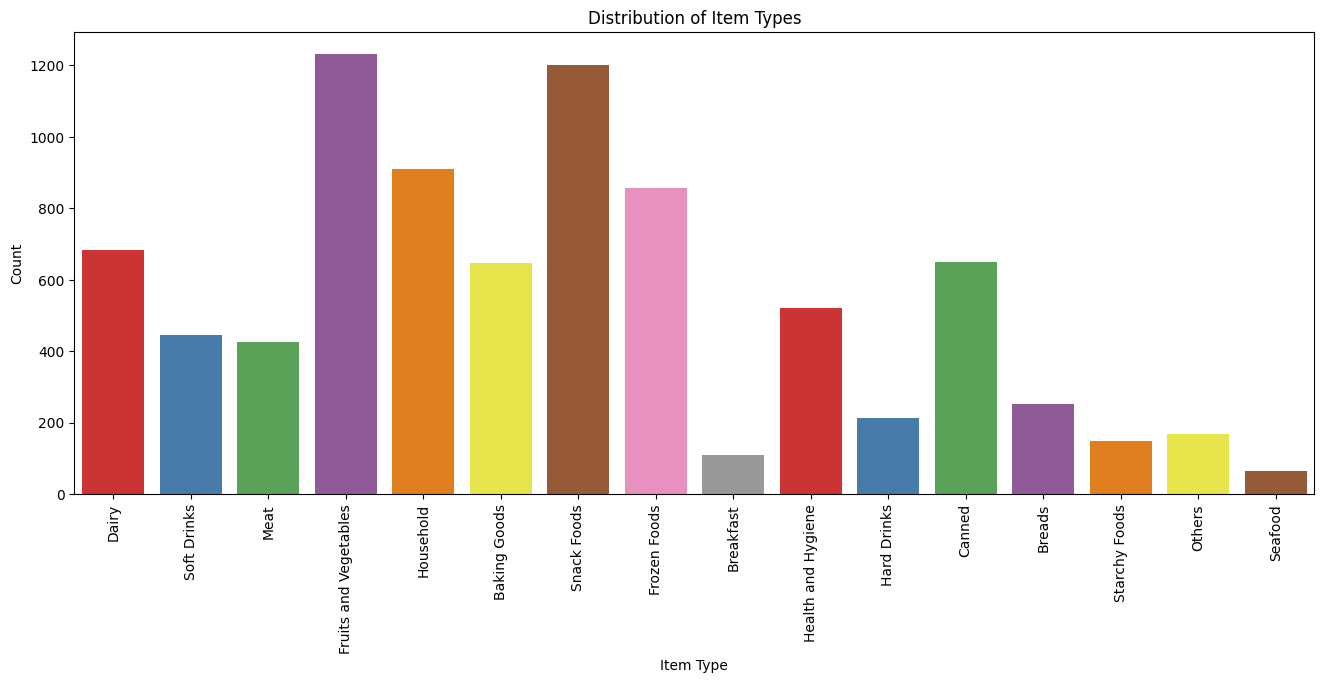

In [64]:
# Count plot for Item Type
plt.figure(figsize=(16, 6))  # Adjust figsize as needed
sns.countplot(x='Item_Type', data=data, palette='Set1')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Distribution of Item Types')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

<ipython-input-65-8bbb4af5ccfc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size', data=data, palette='Set2')


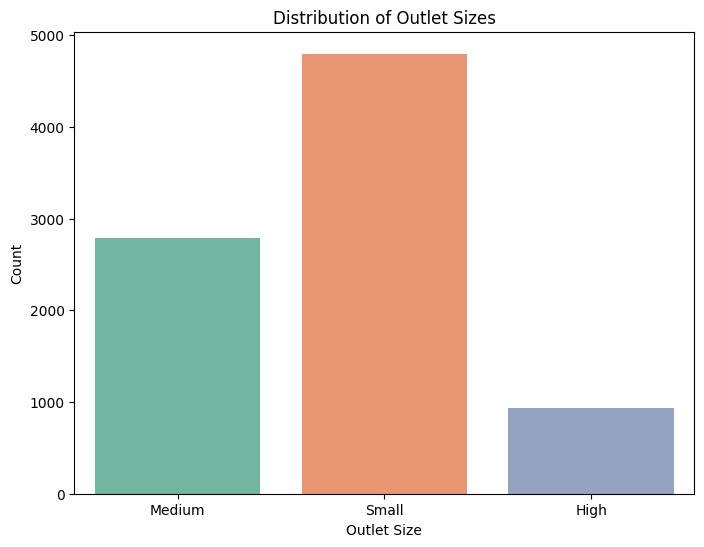

In [65]:
# Count plot for Outlet Size
plt.figure(figsize=(8, 6))
sns.countplot(x='Outlet_Size', data=data, palette='Set2')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Distribution of Outlet Sizes')
plt.show()

In [66]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [67]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [68]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [69]:
encoder = LabelEncoder()

In [71]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
data[categorical_columns] = data[categorical_columns].apply(encoder.fit_transform)

In [73]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [74]:
X = data.drop(columns='Item_Outlet_Sales', axis=1)
Y = data['Item_Outlet_Sales']

In [75]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [77]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [78]:
regressor = XGBRegressor()

In [79]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [80]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [81]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [82]:
print('R Squared value = ', r2_train)

R Squared value =  0.8765209770391698


In [83]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [84]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [85]:
print('R Squared value = ', r2_test)

R Squared value =  0.5067790680407587
